In [1]:
import numpy as np

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb


In [2]:
bn=gum.BayesNet()
l=[bn.add(gum.RangeVariable(item,item,0,15)) for item in ["a","b","c","d","e","f"]]

In [3]:
nmax=bn.addMAX(gum.RangeVariable("MAX","MAX",0,15))
bn.addArc(l[0],nmax)
bn.addArc(l[1],nmax)
bn.addArc(l[2],nmax)

nmin=bn.addMIN(gum.RangeVariable("MIN","MIN",0,15))
bn.addArc(l[3],nmin)
bn.addArc(l[4],nmin)
bn.addArc(l[5],nmin)

nampl=bn.addAMPLITUDE(gum.RangeVariable("DELTA","DELTA",0,15))
bn.addArc(nmax,nampl)
bn.addArc(nmin,nampl)

nmedian=bn.addMEDIAN(gum.RangeVariable("MEDIAN","MEDIAN",0,15))
for n in [l[0],l[1],l[2],l[3]]:
    bn.addArc(n,nmedian)
#potential for median has a size : 16^5=2^20 double !

nexists=bn.addEXISTS(gum.LabelizedVariable("EXISTS_0","EXISTS"),0)
bn.addArc(l[0],nexists)
bn.addArc(l[1],nexists)
bn.addArc(l[2],nexists)

nforall=bn.addFORALL(gum.LabelizedVariable("FORALL_1","FORALL"),1)
bn.addArc(l[3],nforall)
bn.addArc(l[4],nforall)
bn.addArc(l[5],nforall)

ncount=bn.addCOUNT(gum.RangeVariable("COUNT_1","COUNT_1,",0,3),1)
bn.addArc(l[0],ncount)
bn.addArc(l[1],ncount)
bn.addArc(l[2],ncount)

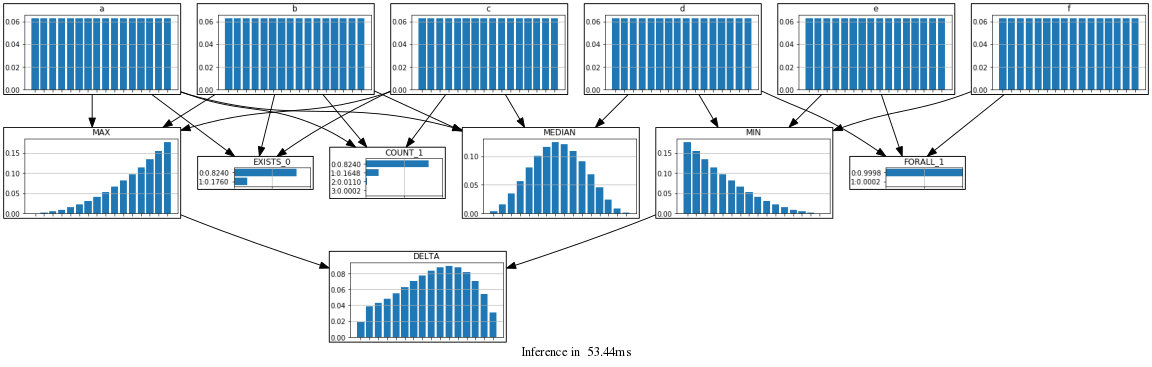

In [4]:
for nod in l:
    bn.cpt(nod)[:]=np.ones(16)/16

bn2=gum.BayesNet(bn) # to force all cpt to be classic Potential
gnb.showInference(bn2,size="12")

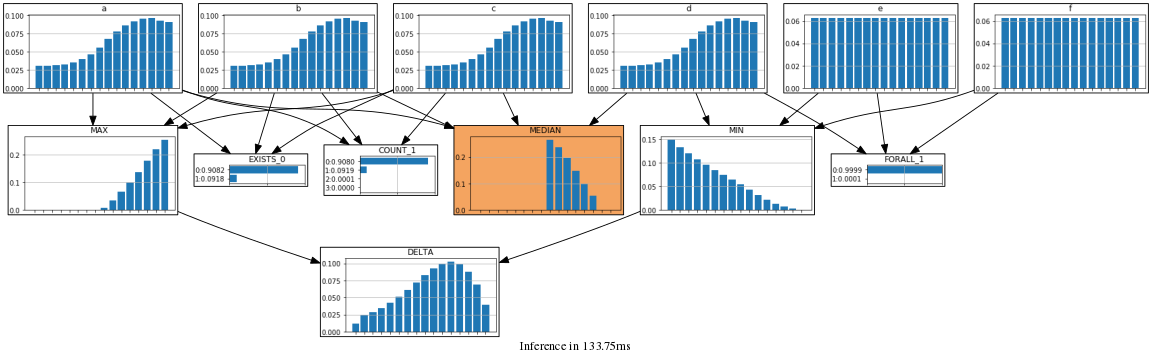

In [5]:
# if I know that the median is beteen 8 and 13 ...
gnb.showInference(bn2,evs={'MEDIAN':[0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0]},size="12")

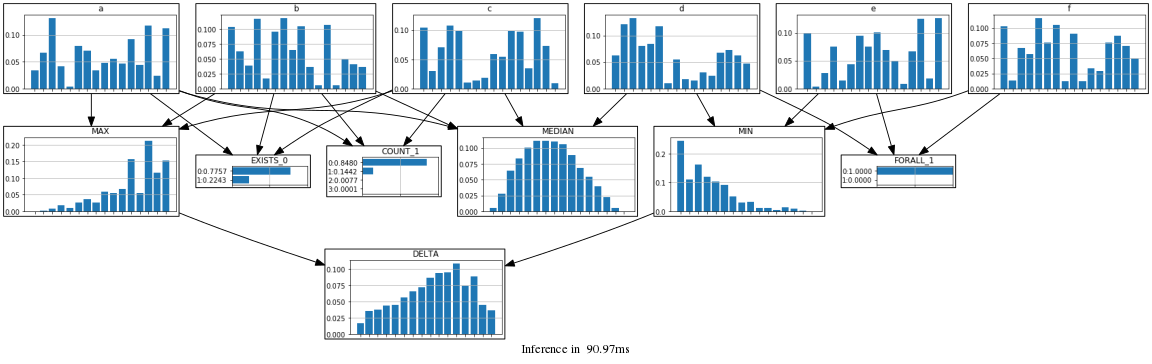

In [6]:
for nod in l:
    bn.generateCPT(nod)

bn2=gum.BayesNet(bn) # to force all cpt to be classic Potential    
gnb.showInference(bn2,size="12")